# Cross-Country Solar Resource Comparison

This notebook compares solar irradiance and resource variability across Benin, Sierra Leone, and Togo using cleaned datasets. The analysis includes summary statistics, statistical tests, and visualizations to highlight differences and similarities in solar potential between countries.

## 1. Setup and Data Loading

Import required libraries and utility functions. Load and combine cleaned datasets for each country, adding a 'Country' column to enable grouped analysis. This step ensures all data is ready for cross-country comparison.

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('..')) 

from scripts.compare_utils import (
    load_country_data, plot_irradiance_boxplots, generate_summary_table,
    perform_stat_tests, plot_avg_ghi_bar
)

# Create figures directory if it doesn't exist
os.makedirs('figures', exist_ok=True)

# Load and combine data from different countries
files = {
    'Benin': '../data/benin-malanville_clean.csv',
    'Sierra Leone': '../data/sierraleone-bumbuna_clean.csv',
    'Togo': '../data/togo-dapaong_qc_clean.csv'
}

try:
    df_combined = load_country_data(files)
except Exception as e:
    print(f"Error loading data: {e}")
    sys.exit(1)

**Output:**
- Combined DataFrame with all countries and a 'Country' column for grouped analysis.

**Explanation:**

* The `load_country_data` function reads each country's cleaned CSV, verifies required columns, adds a 'Country' column, and concatenates them into one DataFrame for comparative analysis.

## 2. Irradiance Boxplots

Visualize the distribution of key irradiance metrics (GHI, DNI, DHI) for each country using boxplots. This helps compare the spread, median, and outliers of solar resource availability between countries.

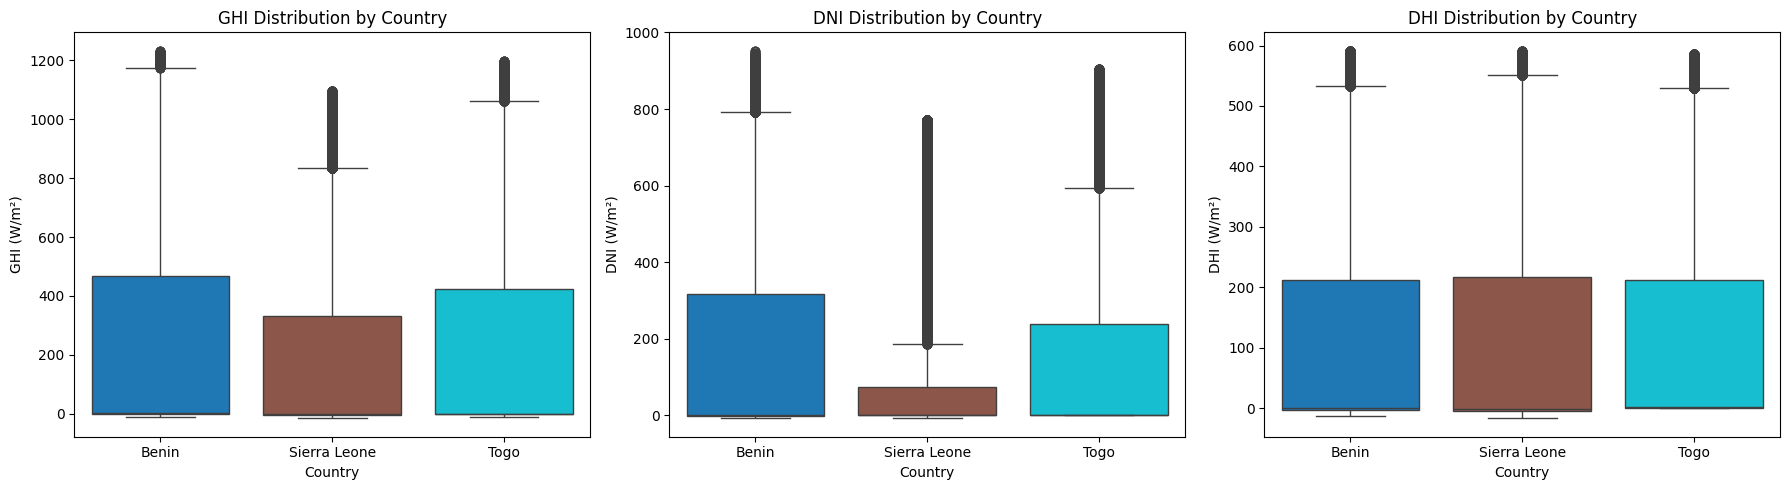

In [2]:
# Boxplots
plot_irradiance_boxplots(df_combined)

**Output:**

* `irradiance_boxplots.png` image saved, showing GHI, DNI, and DHI distributions by country.

**Explanation:**

* Boxplots provide insights into the spread and distribution of irradiance metrics. They help identify medians, variability, and outliers across countries.
* Colors used: Benin (#1F77B4), Sierra Leone (#8C564B), Togo (#17BECF).

**Detailed Comparison:**

* **GHI**: Benin shows the highest median and widest range. Togo has similar variability but slightly lower median. Sierra Leone has the lowest median.
* **DNI**: Benin again leads in median and spread. Sierra Leone lags significantly with low median and variability.
* **DHI**: All three countries show similar medians. Variability is relatively consistent.

## 3. Summary Table

Generate a summary table with the mean, median, and standard deviation of GHI, DNI, and DHI for each country. This provides a quantitative overview of central tendency and variability in solar resource.

In [3]:
# Summary table
generate_summary_table(df_combined)

,Country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,236.23,0.7,328.29,166.90,-0.1,262.08,111.66,0.5,153.10
1,Sierra Leone,185.00,-0.4,279.02,104.13,-0.1,200.95,108.10,-0.6,153.69
2,Togo,223.86,0.5,317.31,147.98,0.0,247.68,112.78,1.5,151.57


**Output:**

* Table showing mean, median, and standard deviation of GHI, DNI, and DHI for each country.

**Explanation:**

* This table helps assess both typical and extreme solar resource values.

**Key Insights:**

* Benin has the highest GHI and DNI mean values, suggesting strongest solar potential.
* Sierra Leone shows lowest means and medians across most metrics.
* Togo’s values fall in between but are closer to Benin than Sierra Leone.

## 4. Statistical Tests

Perform ANOVA and Kruskal–Wallis tests to assess whether differences in GHI, DNI, and DHI between countries are statistically significant. This step provides a rigorous basis for comparing solar resource distributions.

In [4]:
# Statistical tests
stat_results = perform_stat_tests(df_combined)
for metric, result in stat_results.items():
    print(f"\n{metric} Statistical Tests:")
    print(f"ANOVA: F={result['ANOVA']['F-statistic']}, p={result['ANOVA']['p-value']} ({result['ANOVA']['Significance']})")
    print(f"Kruskal–Wallis: H={result['Kruskal–Wallis']['H-statistic']}, p={result['Kruskal–Wallis']['p-value']} ({result['Kruskal–Wallis']['Significance']})")


GHI Statistical Tests:
ANOVA: F=3833.18, p=0.0 (Significant)
Kruskal–Wallis: H=6548.53, p=0.0 (Significant)

DNI Statistical Tests:
ANOVA: F=9340.44, p=0.0 (Significant)
Kruskal–Wallis: H=95729.77, p=0.0 (Significant)

DHI Statistical Tests:
ANOVA: F=130.7, p=0.0 (Significant)
Kruskal–Wallis: H=70089.51, p=0.0 (Significant)


**Output:**

* Test statistics and significance interpretation for GHI, DNI, and DHI.

**Explanation:**

* Both ANOVA and Kruskal–Wallis tests confirm statistically significant differences between countries for all metrics (p < 0.05).

**Conclusion:**

* Differences in solar irradiance between countries are not random; they are statistically significant.

## 5. Average GHI Bar Chart

Visualize the average GHI for each country using a bar chart. This provides a quick, intuitive comparison of overall solar resource strength.

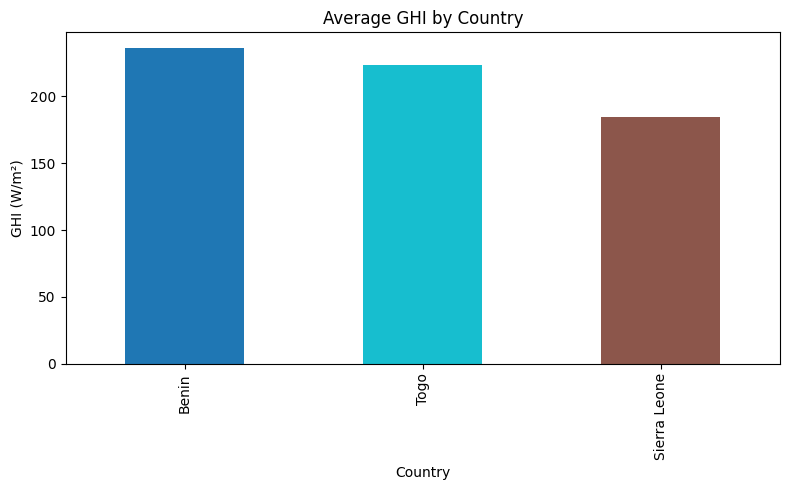

In [5]:
# Bonus: bar chart
plot_avg_ghi_bar(df_combined)

**Output:**

* `average_ghi_bar.png` image saved showing average GHI by country with custom colors.
* Colors used: Benin (#1F77B4), Sierra Leone (#8C564B), Togo (#17BECF).

**Explanation:**

* A simple, intuitive view of each country's overall solar potential based on GHI.
* Bar heights and colors match other plots for consistency.

**Observation:**

* Benin has the highest average GHI, followed by Togo, then Sierra Leone.

## 6. Key Observations

Summarize the most important findings from the summary statistics and statistical tests. This section distills the analysis into actionable insights for decision-makers.

* **Benin shows the highest average and median GHI and DNI**, indicating the strongest solar potential, but also exhibits the **greatest variability**, which may impact predictability and planning.

* **Togo offers a good balance**, with consistently **moderate GHI and DNI values** and **lower variability**, making it attractive for stable solar resource conditions.

* **Sierra Leone has the lowest average solar irradiance** across all metrics and also shows **tight distribution**, suggesting **limited solar potential** but more predictable conditions.